# Water Density

© 2024 Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/porous_media/blob/main/notebooks/water_density.ipynb).



$$
\rho_\mathrm{w} = \frac{M_\mathrm{w}}{V_\mathrm{w}} = f(P, T, \omega)
$$

- $P$ → Pressure
- $T$ → Temperature
- $\omega$ → Solutes

## Required modules and global setup for plots

In [1]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    from subprocess import run
    run('pip install ipympl', shell=True);
    from google.colab import output
    output.enable_custom_widget_manager()
    
# Figures setup
%matplotlib widget
plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)

def display_fig(fig, static_fig=False):
    if static_fig and 'google.colab' in str(get_ipython()):
        display(fig)
    else:
        plt.show()
        display(wgt.HTML(  # To not display the window title
            '<style> div.jupyter-widgets.widget-label {display: none;} </style>'))
    plt.close()

## Functions

In [2]:
def water_density(ρ_0=1000, P_0=100, P=100, β=0.5, T_0=4, T=4, α=-210e-6, ω_0=0, ω=0, γ=0, linear=True): 
    '''
    ρ: density [kg/m³]
    β: compressibility coefficient [1/kPa]
    α: thermal expansion coefficient [1/°C]
    γ: solute concentration [kg/kg]
    '''
    ΔP = P - P_0 
    # print(ΔP)
    ΔT = T - T_0
    Δω = ω - ω_0
    # print(ΔP, ΔT, Δω)

    if linear:
        ρ = ρ_0 * (1 + β * ΔP + α * ΔT + γ * Δω)
    else:
        ρ = ρ_0 * np.exp(β * ΔP + α * ΔT + γ * Δω)
    return ρ

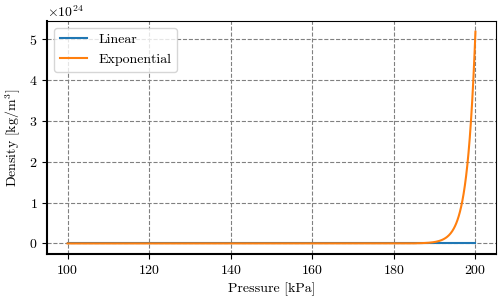

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [3]:
# Density variation when the pressure changes and the rest of the parameters are constant
P = np.linspace(100, 200, 1000)  # [kPa]
ρ_lin = water_density(P=P, linear=True)
ρ_exp = water_density(P=P, linear=False)

# plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(P, ρ_lin, label='Linear')
ax.plot(P, ρ_exp, label='Exponential')
ax.set_xlabel('Pressure [kPa]')
ax.set_ylabel('Density [kg/m$^3$]')
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.ticklabel_format(useOffset=False)
ax.legend()
ax.grid(True, ls='--', c='0.5')
display_fig(fig, static_fig=True)

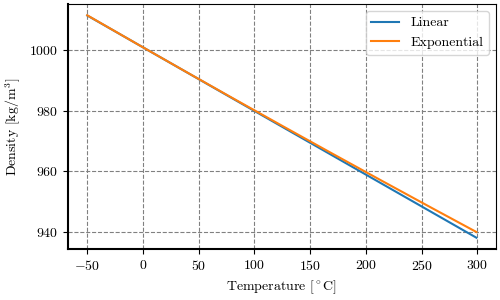

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [4]:
# Density variation when the temperature changes and the rest of the parameters are constant
T = np.arange(-50, 300, 1)
ρ_lin = water_density(T=T, linear=True)
ρ_exp = water_density(T=T, linear=False)

# plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(T, ρ_lin, label='Linear')
ax.plot(T, ρ_exp, label='Exponential')
ax.set_xlabel('Temperature [$^\circ$C]')
ax.set_ylabel('Density [kg/m$^3$]')
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.ticklabel_format(useOffset=False)
ax.legend()
ax.grid(True, ls='--', c='0.5')
display_fig(fig, static_fig=True)
